# Looking Around

## Welcome!

We'll look at a couple examples of using the datasets we've been collecting in-house while working on Waggle. To make this easier, I've included a dataset module which aggregates all the different sensors into a wide, combined Pandas DataFrame.

One general warning before we start: we're still doing a lot of development as of October 2017, so the datasets publically available should be considered experimental and _possibly_ subject to change. On the other hand, for just doing exploratory work it's still be interesting to play around with what's up now.

In [1]:
%matplotlib inline
import pandas as pd
import dataset

## A First Example

We'll start by loading a weeks worth of data from one particular node.

In [2]:
df = dataset.read_datasets([
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-01.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-02.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-03.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-04.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-05.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-06.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e0610ba89/2017-10-07.csv.gz',
])

We'll see what's available by looking at the first few entries.

In [3]:
df.head()

key,APDS-9006-020.intensity,BMI160.acceleration.x,BMI160.acceleration.y,BMI160.acceleration.z,BMI160.index,BMI160.orientation.x,BMI160.orientation.y,BMI160.orientation.z,BMP180.pressure,BMP180.temperature,...,SHT25.temperature,SO2/H2S Temp.adc_temperature,SPV1840LR5H-B.intensity,Si1145.intensity,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:16,97.0,-81.0,979.0,106.0,0.0,0.0,10.0,-11.0,83458.0,16.40,...,1794.0,1853.0,818.0,27956.0,16.71,25.56,574.0,22261.0,21137.0,16.89
2017-10-01 00:00:40,99.0,-77.0,978.0,98.0,0.0,0.0,11.0,-11.0,83452.0,16.30,...,1782.0,1853.0,819.0,27956.0,16.62,25.43,591.0,22260.0,21136.0,16.77
2017-10-01 00:01:04,102.0,-94.0,978.0,63.0,0.0,0.0,8.0,-11.0,83456.0,16.20,...,1771.0,1853.0,819.0,27956.0,16.53,25.31,606.0,22259.0,21135.0,16.66
2017-10-01 00:01:28,106.0,-140.0,979.0,84.0,0.0,0.0,10.0,-11.0,83457.0,16.14,...,1760.0,1826.0,819.0,27956.0,16.44,25.13,619.0,22258.0,21135.0,16.61
2017-10-01 00:01:52,109.0,-104.0,978.0,70.0,0.0,0.0,10.0,-11.0,83454.0,16.11,...,1753.0,1826.0,819.0,27956.0,16.43,25.06,633.0,22258.0,21133.0,16.57


Now we'll plot a few of the raw sensor results in the dataset.

In [4]:
def show_plots(df):
    columns = [
        'HTU21D.temperature',
        'HTU21D.humidity',
        'BMP180.pressure',
    ]

    df[columns].plot(figsize=(16, 12), subplots=True, sharex=True)

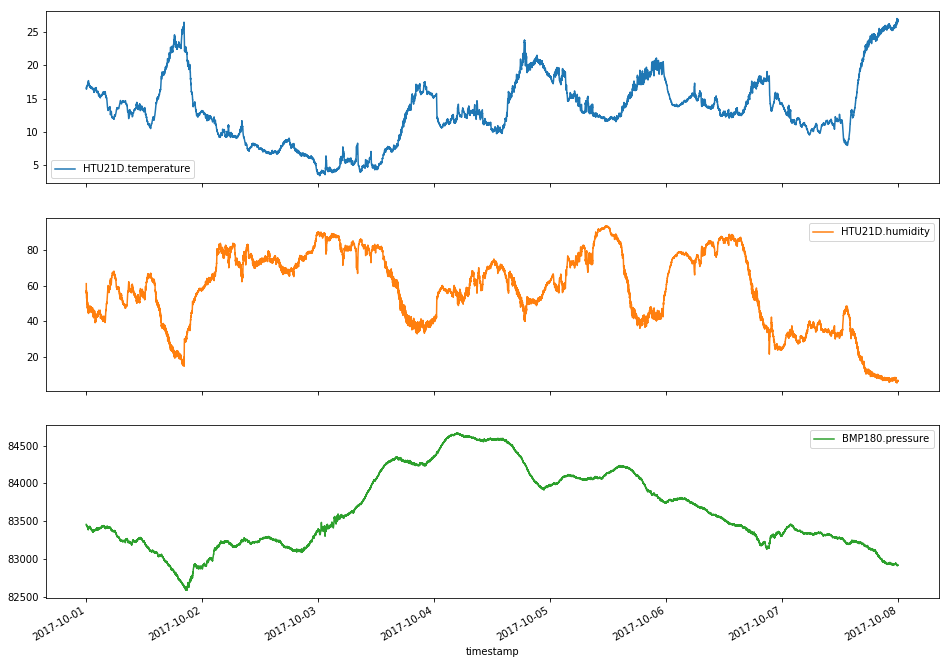

In [5]:
show_plots(df)

This looks a little rough, so we'll resample and take the mean of every 15 minute interval.

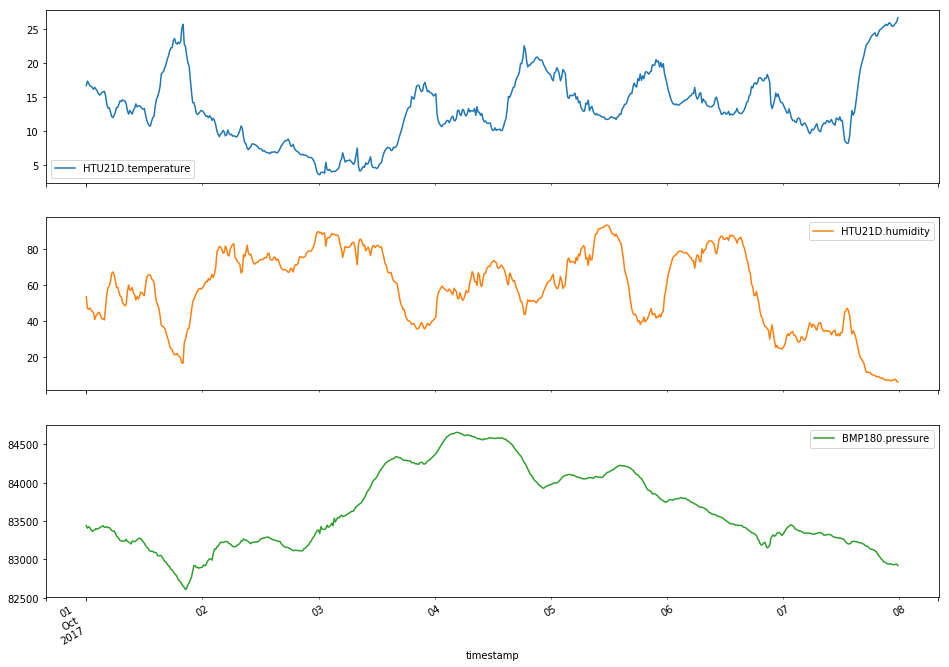

In [6]:
show_plots(df.resample('15Min').mean())

There we go! That looks a bit better! So what should we try next? Line plots are nice but not really the best if we're trying to find a relationship between values. How about we try a scatter plot of temperature and pressure of this node to see if there's an relationship between them using just the data.

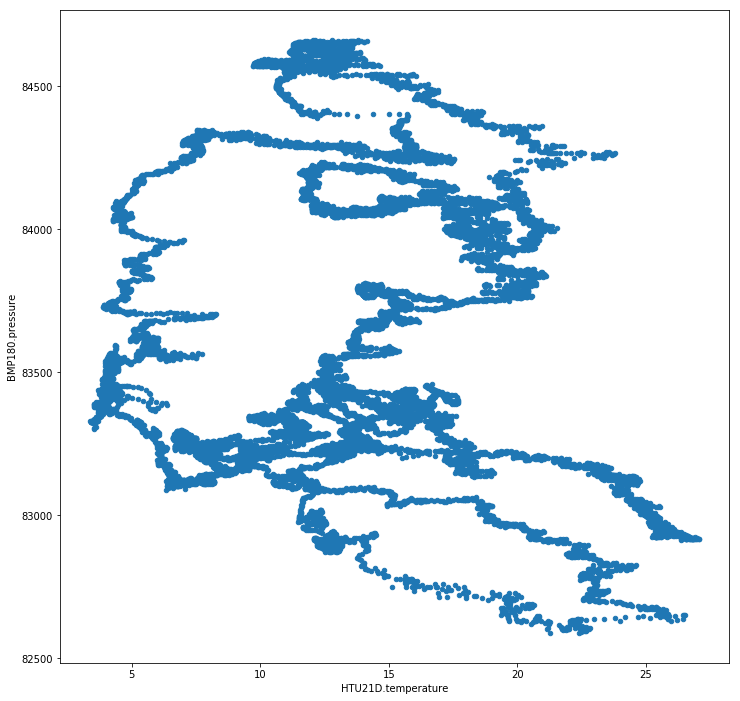

In [7]:
df.plot(kind='scatter', x='HTU21D.temperature', y='BMP180.pressure', figsize=(12, 12))

Hmmm...this doesn't look too promising. Perhaps we'd like to see if there's some other factors governing what's going on here? Let's take the same plot and see if the humidity reveals some grouping of what's here.

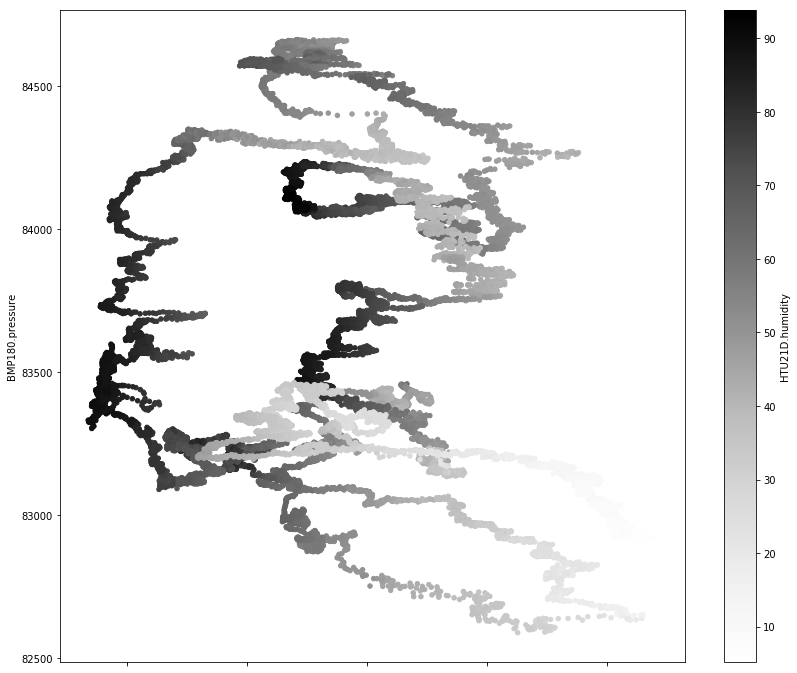

In [8]:
df.plot(kind='scatter', x='HTU21D.temperature', y='BMP180.pressure', c='HTU21D.humidity', figsize=(14, 12))

With this alone, it's hard to say whether we're seeing much here or not. However, with some modifications, this could be the start of finding some interesting patterns or structure in this data.

## A Second Example

We'll look at data from one more node which we've had testing on and off. In cases like this, you tend to have missing windows of data so resampling can improve the presentation of timeseries visualizations.

In [10]:
df = dataset.read_datasets([
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e061088a6/2017-09-26.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e061088a6/2017-09-27.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e061088a6/2017-09-28.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e061088a6/2017-10-05.csv.gz',
    'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/001e061088a6/2017-10-06.csv.gz',
])

In [11]:
def show_plots(df):
    columns = [
        'HTU21D.temperature',
        'HTU21D.humidity',
        'BMP180.pressure',
        'Rain Gauge.rain_inches',
    ]

    df[columns].plot(figsize=(16, 12), subplots=True, sharex=True)

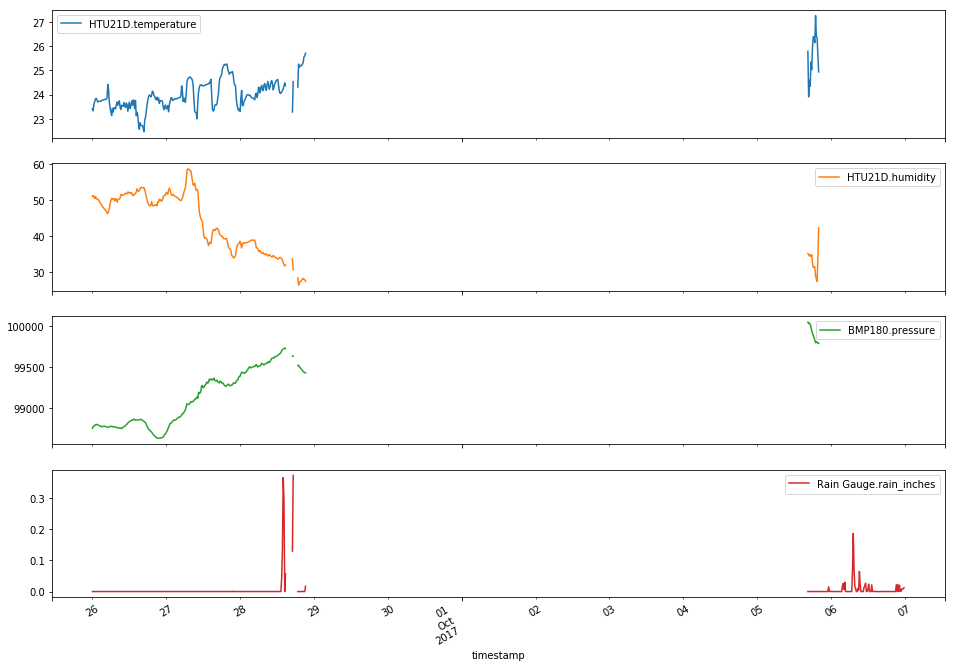

In [12]:
show_plots(df.resample('15Min').mean())

Without resampling, we would've had lines connecting data points no matter how far apart they are. For nodes which have been up intermittently, this looks ugly and can be outright misleading!